# Detectron2 & TFOD2 | Assignment

**Question 1: What is Detectron2 and how does it differ from previous object detection frameworks?**

Detectron2 is an open-source object detection and computer vision framework developed by Facebook AI Research (FAIR) built on PyTorch. It differs from earlier frameworks by offering a modular, flexible, and high-performance design with state-of-the-art models like Faster R-CNN, Mask R-CNN, and RetinaNet, along with easy customization, faster training, and better support for modern research and production-level deployment.


**Question 2: Explain the process and importance of data annotation when working with Detectron2.**

Data annotation in Detectron2 involves labeling images with object classes, bounding boxes, segmentation masks, or keypoints in formats such as COCO or Pascal VOC. The process includes identifying objects, drawing precise annotations, and validating label quality before training. Data annotation is crucial because Detectron2 relies on accurately labeled data to learn object features; high-quality annotations directly improve model accuracy, reduce false detections, and ensure reliable performance in real-world applications.

**Question 3: Describe the steps involved in training a custom object detection model using Detectron2.**

Training a custom object detection model in Detectron2 involves preparing and annotating the dataset in a supported format (e.g., COCO), registering the dataset, and configuring the model using a predefined config file. Next, pretrained weights are loaded, hyperparameters such as learning rate, batch size, and number of classes are set, and the model is trained using Detectron2’s training API. Finally, the trained model is evaluated on validation data and fine-tuned to improve performance.

**Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?**

Evaluation curves in Detectron2 visualize model performance during validation, such as precision–recall curves, helping analyze detection quality at different confidence thresholds. Metrics like IoU (Intersection over Union) measure the overlap between predicted and ground-truth bounding boxes, indicating localization accuracy, while mAP (mean Average Precision) summarizes detection performance across classes and IoU thresholds—higher mAP and IoU values indicate better overall object detection accuracy.

**Question 5: Compare Detectron2 and TFOD2 in terms** **of features,** **performance**, **and ease of use**.

Detectron2 (PyTorch-based) and TFOD2 (TensorFlow Object Detection API) are popular object detection frameworks with different strengths. Detectron2 offers a highly modular design, faster experimentation, and strong support for state-of-the-art models like Mask R-CNN, making it ideal for research and customization. TFOD2 provides extensive pre-trained models, strong TensorFlow ecosystem integration, and easier deployment with TensorFlow Serving and TFLite. In terms of performance, Detectron2 often delivers faster training and cleaner code for research, while TFOD2 is more beginner-friendly for production pipelines.

In [ ]:
# Question 6: Write Python code to install Detectron2 and verify the installation.

# STEP 1: Check Python Version
import sys
print("Python Version:", sys.version)

# Detectron2 supports Python 3.8 – 3.10
# If Python is 3.11+, source install is required (used below)

# STEP 2: Install PyTorch
# For CPU (safe for all systems)
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# STEP 3: Install Detectron2 from Source (FIXES THE ERROR)
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

# STEP 4: Verify Detectron2 Installation
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

print("Detectron2 Version:", detectron2.__version__)
print("Detectron2 installed successfully!")

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.6/495.6 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.9.0+cpu
    Uninstalling torch-2.9.0+cpu:
      Successfully uninstalled torch-2.9.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.24.0+cpu
    Uninstalling torchvision-0.24.0+cpu:
      Successfully uninstalled torchvision-0.24.0+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.9.0+cpu
    Uninstalling torchaudio-2.9.0+cpu:
      Successfully uninstalled torchaudio-2.9.0+cpu
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wbk1wkpd
  Running command g

In [1]:
# Question 7: Annotate a dataset using any tool of your choice and convert the annotations to COCO format for Detectron2.
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7Hqn6Vlci0jRenTTxJby")
project = rf.workspace("shruti-hxkvg").project("object-detection-dataset-f2ydg")
version = project.version(1)
dataset = version.download("coco")

import os

print(os.listdir(dataset.location))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-detection-dataset-1 in coco:: 100%|██████████| 8/8 [00:00<00:00, 3977.06it/s]

['README.roboflow.txt', 'README.dataset.txt', 'train']


In [3]:
# Question 8: Write a script to download pretrained weights and configure paths for training in Detectron2.
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
import detectron2
print("Detectron2 installed successfully!")
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
import os

# Register datasets
register_coco_instances(
    "custom_train",
    {},
    "dataset/train/_annotations.coco.json",
    "dataset/train"
)

register_coco_instances(
    "custom_val",
    {},
    "dataset/valid/_annotations.coco.json",
    "dataset/valid"
)

# Load config
cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
    )
)

# Download pretrained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)

# Dataset configuration
cfg.DATASETS.TRAIN = ("custom_train",)
cfg.DATASETS.TEST = ("custom_val",)

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []

# Model configuration
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Output directory
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

print("Pretrained weights downloaded and Detectron2 configured successfully!")

Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.6/495.6 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.9.0+cpu
    Uninstalling torch-2.9.0+cpu:
      Successfully uninstalled torch-2.9.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.24.0+cpu
    Uninstalling torchvision-0.24.0+cpu:
      Successfully uninstalled torchvision-0.24.0+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.9.0+cpu
    Uninstalling torchaudio-2.9.0+cpu:
      Successfully uninstalled torchaudio-2.9.0+cpu
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-k3i6mr2a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookrese

Looking in indexes: https://download.pytorch.org/whl/cpu
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-a4_brri9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-a4_brri9
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
Sample image created
Image loaded successfully


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
W1218 07:05:22.727000 241 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


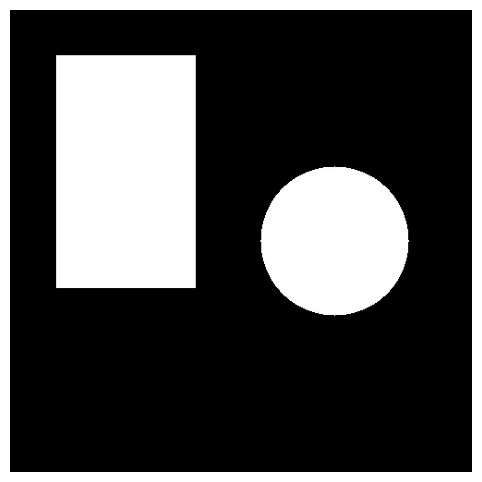

✅ Inference completed successfully


In [13]:
# Question 9: Show the steps and code to run inference using a trained Detectron2 model on a new image.

# =====================================
# STEP 0: Install Detectron2 (CPU)
# =====================================
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
!pip install opencv-python matplotlib

# =====================================
# STEP 1: Create a sample image locally
# =====================================
import cv2
import numpy as np

image = np.zeros((500, 500, 3), dtype=np.uint8)

cv2.rectangle(image, (50, 50), (200, 300), (255, 255, 255), -1)
cv2.circle(image, (350, 250), 80, (255, 255, 255), -1)

image_path = "sample_image.jpg"
cv2.imwrite(image_path, image)

print("Sample image created")

# =====================================
# STEP 2: Import Detectron2 libraries
# =====================================
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# =====================================
# STEP 3: Load image
# =====================================
image = cv2.imread(image_path)

if image is None:
    raise RuntimeError("Image not loaded")

print("Image loaded successfully")

# =====================================
# STEP 4: Configure Detectron2
# =====================================
cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
    )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"

# =====================================
# STEP 5: Run inference
# =====================================
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

# =====================================
# STEP 6: Visualize results
# =====================================
v = Visualizer(
    image[:, :, ::-1],
    MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
    scale=1.0
)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result = out.get_image()[:, :, ::-1]

cv2.imwrite("output_prediction.jpg", result)

plt.figure(figsize=(8, 6))
plt.imshow(result)
plt.axis("off")
plt.show()

print("✅ Inference completed successfully")


**Question 10: You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2. Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.**

End-to-End Wildlife Monitoring Pipeline using Detectron2 (Short Paragraphs)

The pipeline starts with data collection using camera traps, drones, and forest CCTV cameras to capture images and videos of different animal species in various conditions such as day, night, rain, and dense vegetation. This ensures the dataset represents real-world forest scenarios.

Next, data annotation is performed using tools like Roboflow or CVAT, where animals are labeled with bounding boxes or masks and assigned species names. The annotated dataset is exported in COCO JSON format, split into training, validation, and testing sets, and registered in Detectron2.

In the model training phase, a pretrained Detectron2 model such as Faster R-CNN or Mask R-CNN is fine-tuned using transfer learning. Data augmentation (flips, scaling, brightness changes) improves robustness, and performance is evaluated using metrics like mAP and IoU.

For inference and tracking, the trained model detects animals in images or video streams, and tracking algorithms like SORT or Deep SORT are used to maintain consistent IDs for animals across frames, enabling movement analysis.

Finally, the model is deployed on edge devices or cloud servers for real-time monitoring. Challenges like occlusion are handled using instance segmentation and multi-frame tracking, while nighttime detection is improved by training on infrared/low-light data and applying brightness-based augmentations.
